<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/ALPHAFOLD3_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- 2. Running Basic Protein Sequence Analysis ---
Target: Example Peptide
Sequence: GAILYNIKR
Length: 9 amino acids

Amino Acid Composition:
AA  Count
 I      2
 R      1
 A      1
 G      1
 K      1
 Y      1
 L      1
 N      1


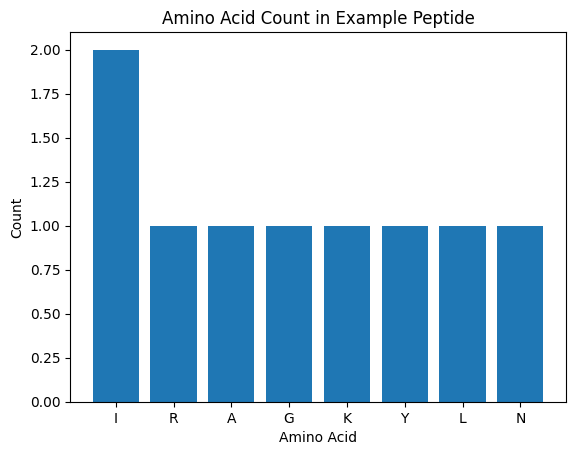


--- Execution Complete ---


In [1]:
# 2. IMPORTS: Import required Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3. DATA: Define the protein sequence for analysis.
# Example: A sequence from a short peptide (PDB 1A2C sequence)
amino_acid_sequence = "GAILYNIKR"
protein_name = "Example Peptide"

# 4. ANALYSIS: Perform basic sequence characterization.
sequence_length = len(amino_acid_sequence)
amino_acid_counts = {aa: amino_acid_sequence.count(aa) for aa in set(amino_acid_sequence)}

# 5. RESULTS: Display the analysis summary.
print("\n--- 2. Running Basic Protein Sequence Analysis ---")
print(f"Target: {protein_name}")
print(f"Sequence: {amino_acid_sequence}")
print(f"Length: {sequence_length} amino acids")

print("\nAmino Acid Composition:")
# Convert dictionary to a DataFrame for neat display
df_counts = pd.DataFrame(list(amino_acid_counts.items()), columns=['AA', 'Count'])
print(df_counts.to_string(index=False))

# 6. VISUALIZATION (Optional but great for Colab demos)
fig, ax = plt.subplots()
ax.bar(amino_acid_counts.keys(), amino_acid_counts.values())
ax.set_title(f'Amino Acid Count in {protein_name}')
ax.set_xlabel('Amino Acid')
ax.set_ylabel('Count')
plt.show()
print("\n--- Execution Complete ---")

In [6]:
# 🦠 PLOTLY DEMO: COVID-19 STRUCTURE WITH WARNINGS SUPPRESSED

# 0. WARNING SUPPRESSION
import warnings
from Bio.PDB.PDBExceptions import PDBConstructionWarning

# Filter the specific Biopython warning, as it's common for complex PDBs
warnings.filterwarnings('ignore', category=PDBConstructionWarning)

# 1. SETUP: Install necessary packages.
print("--- 1. Setting up Environment ---")
!pip install biopython plotly > /dev/null

# 2. IMPORTS
import plotly.graph_objects as go
from Bio.PDB import PDBList, PDBParser
import os

# 3. CHOOSE PDB ID
# 6M0J: SARS-CoV-2 Spike Receptor-Binding Domain (RBD) bound to human ACE2 receptor
PDB_ID = "6M0J"  # @param {type:"string"}
PDB_FILE_NAME = f"pdb{PDB_ID.lower()}.ent"

# 4. DOWNLOAD THE PDB FILE
print(f"\n--- 2. Downloading Complex PDB ID: {PDB_ID} ---")
pdbl = PDBList()
pdbl.retrieve_pdb_file(PDB_ID, pdir='.', file_format='pdb', overwrite=True)

# 5. READ AND EXTRACT COORDINATES
print("--- 3. Extracting Coordinates ---")
# The parser will no longer print the discontinuity warnings
parser = PDBParser()
structure = parser.get_structure(PDB_ID, PDB_FILE_NAME)

# Extract coordinates for C-alpha atoms and use chain ID for color
xs, ys, zs, names, colors = [], [], [], [], []
# A: ACE2 (Human Receptor), E: Spike Protein (Virus)
color_map = {'A': 'red', 'E': 'blue'}

for model in structure:
    for chain in model:
        for residue in chain:
            if 'CA' in residue:
                atom = residue['CA']
                coord = atom.get_coord()
                xs.append(coord[0])
                ys.append(coord[1])
                zs.append(coord[2])

                chain_id = chain.id
                colors.append(color_map.get(chain_id, 'gray'))
                names.append(f"{chain_id}: {residue.get_resname()} {residue.get_id()[1]}")

# 6. PLOT WITH PLOTLY
print("--- 4. Launching Interactive Plotly Viewer ---")
trace = go.Scatter3d(
    x=xs, y=ys, z=zs,
    mode='markers+lines',
    marker=dict(size=4, color=colors, opacity=0.8),
    line=dict(color='gray', width=1),
    hoverinfo='text',
    text=names
)

fig = go.Figure(data=[trace])
fig.update_layout(
    title=f'3D Structure of COVID Spike RBD / ACE2 Complex ({PDB_ID})',
    scene=dict(aspectmode='data')
)

fig.show(renderer="colab")

# Clean up
if os.path.exists(PDB_FILE_NAME):
    os.remove(PDB_FILE_NAME)

print("\n--- Execution Complete: Check for the interactive Plotly graph above ---")

--- 1. Setting up Environment ---

--- 2. Downloading Complex PDB ID: 6M0J ---
--- 3. Extracting Coordinates ---
--- 4. Launching Interactive Plotly Viewer ---



--- Execution Complete: Check for the interactive Plotly graph above ---
